# (0)주제
#### 뉴스를 통해 '코로나19'와 관련하여 일어난 사건을 분석해보자

## (1)프로젝트 목표 및 내용
        공중파인 SBS와 한겨레 두 신문사를 통해 '코로나19'를 키워드로 하여 뉴스에 쓰인 단어들을 분석한다. 그 단어들을 통해 월마다 무슨 사건이 발생하였는지 살펴보며 코로나 사건의 전반적인 흐름을 알아보자. 그리고 국내에서 확진자가 가장 많이 발생한 대구/경북, 경기, 서울, 인천의 확진자 수와 뉴스가 관련이 있는지 확인해보자.

## (2)주제 선정 이유 또는 이 프로젝트의 필요성
        1. 공중파와 공중파가 아닌 신문사의 차이점을 알 수 있다
        2. 코로나19로 인해 2020년의 반이 어떻게 흘러갔는지 알 수 있다.
        3. 코로나19를 예방하기 위해 필요한 것들을 알 수 있다.
        4. 신문사별로 지향하는 것이 무엇인지 알 수 있다.
        5. 다른 달에 비해 안정적이었던 4월에는 부정적인 단어가 적게 쓰였을 것이다.
        6. 코로나가 본격적으로 시작된 2월에 부정적인 단어가 많이 쓰였을 것이다.
        
        주제를 바꾼 이유
        왓챠에서 데이터를 획득하였으나, 이를 가공하는 과정에서 의미있는 결과를 내기 힘들다고 생각했다. 그래서 보다 더 나은 좋은 결과를 얻기 위해 주제를 바꾸었다.

## (3)데이터 획득
   -sbs뉴스(공중파)
   
   -한겨레 뉴스
   
   -경기도(https://www.gg.go.kr/bbs/board.do?bsIdx=722&menuId=2903#page=1)
   
   -대구(http://www.daegu.go.kr/dgcontent/index.do?menu_id=00936642&menu_link=/icms/bbs/selectBoardArticle.do&bbsId=BBS_02112)
   
   -서울(https://www.seoul.go.kr/coronaV/coronaStatus.do)
   
   =>확진자추이/날짜검색
         
   -인천(https://www.incheon.go.kr/health/HE020409)

## (4)구현 내용 설명

     1)SBS뉴스 1-5월
     SBS 뉴스에서 '코로나19'를 검색하고 날짜는 1월1일-1월31일, 정렬은 정확도순으로 설정한다. 그 곳에서 기사의 제목과 내용 일부를 1쪽부터 100쪽까지 (약 천개의 기사) 크롤링한다. 그리고 얻은 내용들을 knolpy를 통해 형태소 분석을 하여 명사만 추출한다. 그 후, 쓰인 단어와 그 단어가 사용된 횟수를 csv파일과 dictionary형태로 만든다. dict형태는 wordcloud를 만들기 위해 사용된다. 밑에는 그 예시이다. 나머지 달도 url만 바꾼 상태로 똑같이 진행한다.
     
   ### 기능 : 추출한 문장에서 단어 분석

처음에는 띄어쓰기를 단위로 단어를 구분하려고 하였으나 맨 아래의 결과처럼 제대로 이루어지지 않았다. 그래서 
아래 방법 처럼, konlpy를 사용하여 형태소를 분석할 것이다.

In [64]:
from konlpy.tag import Kkma
kkma = Kkma()

txt = '웹파이선 텀프로젝트를 하는 중입니다' 
kkma.pos(txt)

[('웹', 'NNG'),
 ('파이', 'NNG'),
 ('선', 'NNG'),
 ('텀', 'NNB'),
 ('프로젝트', 'NNG'),
 ('를', 'JKO'),
 ('하', 'VV'),
 ('는', 'ETD'),
 ('중', 'NNB'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN')]

(모듈 생략)

### 내용획득

article_title = []

article_detail = []

for i in range(1,100):

    driver = webdriver.Chrome()
       
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.05.01&searchTermEndDate=2020.05.31&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=3&sort=RANK'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    
    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
    #print(details)
    #print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

    #txt = article_title
    #kkma.pos(txt)

### 형태소 분석을 통해 명사만 리스트에 따로 저장

    noun_list = []
    for i in range(len(article_title)):
        txt = article_title[i]
        noun = kkma.nouns(txt)
        noun_list.append(noun)

### 단어와 그 단어가 몇번 쓰였는지 알기 위한 for문    

    count_text = []
    count = []

    for i in range(len(noun_list)):
        for j in range(len(noun_list[i])):
            if(noun_list[i][j] not in count_text):
                count_text.append(noun_list[i][j])
                count.append(1)
            elif(noun_list[i][j] in count_text):
                for k in range(len(count_text)):
                    if(noun_list[i][j]== count_text[k]):
                        count[k] += 1
                        break

### 파일 저장

    f1 = open('SBS5월.csv','w',encoding = 'utf-8',newline='')

    wr1 = csv.writer(f1)
    wr1.writerow(["5월단어", " 개수"])
    for i in range(len(count)):
        wr1.writerow([count_text[i],count[i]])

### 워드클라우드로 만들기 위해 dict형으로 변환하기 위한 작업

    last = []

    for i in range(len(count)):
        imsi = []
        imsi.append(count_text[i])
        imsi.append(count[i])
        last.append(imsi)

    new = dict(last)

### 워드클라우드 생성

    wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
    wc_img = wc.generate_from_frequencies(new)
    wc_img.to_file('SBS5월워드클라우드.jpg')

##### 위처럼 csv파일을 저장했으나, 그 단어의 수가 몇천이 넘어가서 분석하기 좋지 않다고 생각하여, 일정 횟수 이상 사용된 단어들만 모아서 다시 새로운 파일을 만듦.

### 기능: 원하는 달을 선택하여 n회 이상 언급된 단어만 모아 파일 만들기

def SBS_select(month,n):
    
    f = open('SBS{}월.csv'.format(month), 'r', encoding='utf-8')


    rdr = csv.reader(f)

    num = []
    word = []

    for line in rdr:
        word.append(line[0])
        num.append(line[1])

    f.close()

    f1 = open('SBS{}월-1.csv'.format(month),'w',encoding = 'utf-8',newline='')

    wr1 = csv.writer(f1)

    wr1.writerow([str(month)+"월단어", " 개수"])
    for i in range(1,len(num)):
        if(int(num[i])>n):
            wr1.writerow([word[i],num[i]])

    f1.close()

### 새로 만든 csv파일을 바탕으로, 공통적으로 드러나는 단어를 선택하여 정리함
  그러나 만든 csv파일들이 모두 깨진 상태로 저장되었음. pandas를 이용하여 불렀을 때는 정상적으로 보이나 중간에 글씨들이 안보이기 때문에, pandas를 이용하여, 내가 원하는 단어가 몇 번 쓰였는지 알려주는 함수를 만들었다.

## 찾고싶은 단어 찾기

#### SBS파일
    def find_sbsword(month,word):
        df=pd.read_csv('SBS{}월.csv'.format(month),encoding='utf-8')
        finding = df['{}월단어'.format(month)]==word
        A=df[finding]
        return A

#### 한겨레파일
    def find_haniword(month,word):
        df=pd.read_csv('한겨레{}월.csv'.format(month),encoding='utf-8')
        finding = df['{}월단어'.format(month)]==word
        A=df[finding]
        return A

2) 한겨레 1-5월

## (5)분석 결과 또는 구현 결과


    구현을 통해 얻은 파일은 아래와 같다.
    
    1. 1-5월동안 전반적으로 사용된 주요 단어 csv 파일
    2. 월별 전체단어 csv 파일
    3. 월별 일정 횟수 이상 쓰인 단어 csv 파일
    4. 사용된 전체 단어로 만들어진 워드클라우드
    
    2와 3은 csv파일을 따로 첨부할 예정이나, 글씨가 깨져서 pandas나 csv로만 읽어진다. 이를 보고서에 전부 넣으면 너무 길어지기 때문에 밑에 find_what_you_want() 함수를 통하여 원하는 표를 볼 수 있도록 하였다. 
    (실행이 안 될 시, 바로 밑에 있는 함수들을 먼저 실행해주세요)   
    

# 1-SBS 주요단어

In [3]:
import pandas as pd

df = pd.read_csv('total_sbs.csv',index_col='SBS단어',encoding = 'utf-8')
df

,1월,2월,3월,4월,5월
SBS단어,,,,,
코로나,32,931,998,984,824
코로나19,0,905,970,993,729
브라질,1,9,26,40,45
미국,2,21,97,93,99
중국,10,141,50,97,59
영국,1,6,19,44,33
백신,0,7,8,16,36
유럽,2,14,34,35,32
일본,2,78,62,102,128


# 1-한겨레 주요 단어

In [216]:
import pandas as pd

df = pd.read_csv('total_hani.csv',index_col='한겨레단어',encoding = 'utf-8')
df

,1월,2월,3월,4월,5월
한겨레단어,,,,,
코로나,6,746,984,628,443
코로나19,0,430,770,377,213
일본,1,33,15,21,21
감염,1,64,33,35,61
사망자,0,34,33,23,5
환자,4,75,65,53,28
중국,7,79,21,22,24
확산,3,55,38,17,23
대구,0,97,110,40,12


# 2,3 - SBS/한겨레
    SBS 1월 예시

In [17]:
import pandas as pd

df = pd.read_csv('SBS1월-1.csv',encoding = 'utf-8')
df

,1월단어,개수
0,진자,8
1,신종,17
2,코로나,32
3,2,7
4,중국,6
5,우,22
6,신,7
7,종,7
8,진,9
9,명,14


In [18]:
import csv
import pandas as pd

find_what_you_want()

원하는 신문사를 입력하세요 ( SBS or 한겨레 or exit(0) ): 0


In [10]:
def find_SBS_whole_file():
    while True:
        month = int(input("원하는 달을 입력하세요(1~5): "))
        if(month>5 or month<1):
            print("1~5 사이의 숫자를 입력해주세요.")
            continue
        else:
            df = pd.read_csv('SBS{}월.csv'.format(month),encoding = 'utf-8')
            print(df)
            break

def find_SBS_month_file():
    while True:
        month = int(input("원하는 달을 입력하세요(1~5): "))
        if(month>5 or month<1):
            print("1~5 사이의 숫자를 입력해주세요.")
            continue
        else:
            df = pd.read_csv('SBS{}월-1.csv'.format(month),encoding = 'utf-8')
            print(df)
            break

def find_hani_whole_file():
    while True:
        month = int(input("원하는 달을 입력하세요(1~5): "))
        if(month>5 or month<1):
            print("1~5 사이의 숫자를 입력해주세요.")
            continue
        else:
            df = pd.read_csv('한겨레{}월.csv'.format(month),encoding = 'utf-8')
            print(df)
            break
            
def find_hani_month_file():
    while True:
        month = int(input("원하는 달을 입력하세요(1~5): "))
        if(month>5 or month<1):
            print("1~5 사이의 숫자를 입력해주세요.")
            continue
        else:
            df = pd.read_csv('한겨레{}월-1.csv'.format(month),encoding = 'utf-8')
            print(df)
            break

In [1]:
def find_what_you_want():
    while True:
        platform = str(input("원하는 신문사를 입력하세요 ( SBS or 한겨레 or exit(0) ): "))

        if(platform == 'SBS'):
            num = int(input("1. 1-5월 통합 주요단어"+'\n'+"2. 월 별 단어 사용량 "+'\n'+'1 or 2 or 종료(0) : '))        
            if (num == 1):
                find_SBS_whole_file()
            elif (num == 2):
                find_SBS_month_file()
            elif (num ==0):
                break
            else:
                print("잘못 입력하였습니다.")
                continue
        elif(platform == '한겨레'):
            num = int(input("1. 1-5월에 공통적으로 사용된 단어"+'\n'+"2. 월 별 단어 사용량 "+'\n'+'1 or 2 or 종료(0) : ')) 
            if (num == 1):
                find_hani_whole_file()
            elif (num == 2):
                find_hani_month_file()
            elif (num ==0):
                break
            else:
                print("잘못 입력하였습니다.")
                continue
        elif(platform=='0'):
            break
        else:
            print("잘못 입력하였습니다.")
            continue

# 뉴스 월별 분석

   ### 밑에서 사진을 검색해서, 정리해 둔 것과 비교해보세요.

# SBS 뉴스 - 전반적인 흐름, 어느 한 사건에 치우치지 않음

1월 : 폐렴, 우(한), 신종, 환자, 국내, 1339, 감염, 중국, 중, 정부 
    
    => 코로나의 시작

2월 : 신천지, 사망자, 감염, 확산, 연기,일본, 대구, 이탈리아, 크루즈, 크루즈선, 연기, 마스크 

    =>신천지 사건, 크루즈선 사건, 일본-올림픽, 경북과 대구, 외국+학교 연기에 대한 이야기, 마스크 대란의 시작

3월 : 세계, 미국, 스페인, 중국, 영국, 이탈리아, 브라질, 유럽, 뉴욕 등/ 마스크, 입국, 경제, 브리핑 등

    => 다양한 나라와 도시가 언급 / 개학, 마스크 대란, 격리 등 다양한 문제들이 복합적으로 심화되어가던 달

4월 : 무증상, (집단)감염, 치료제, 백신

    => 한국은 안정을 찾아가고 있던 시기. 3월과 마찬가지로 다양한 나라와 도시가 언급되었으며, 본격적으로 코로나를 벗어나기 위한 해결책을 마련하고 있는 것으로 보인다. (치료제, 백신)

5월 : 치료제, 백신,개발,임상, 치료, 클럽, 등교, 시험, 연기, 이태원, 클럽발, 마스크 , 외국

    => 4월과 마찬가지로 해결책을 찾기 위한 노력은 계속 되고있는 듯 보인다. 또한 5월에는 학교와 관련하여 말이 많은듯 보인다. 그리고 터진 클럽발로 인해 감염,확산, 신규같은 부정적인 단어들이 다시 커지기 시작했다. ( (6)결론 그래프 참고)

원하는 신문사를 입력해주세요 (SBS or 한겨레) : 한겨레
원하는 달을 입력해주세요(1-5) : 2


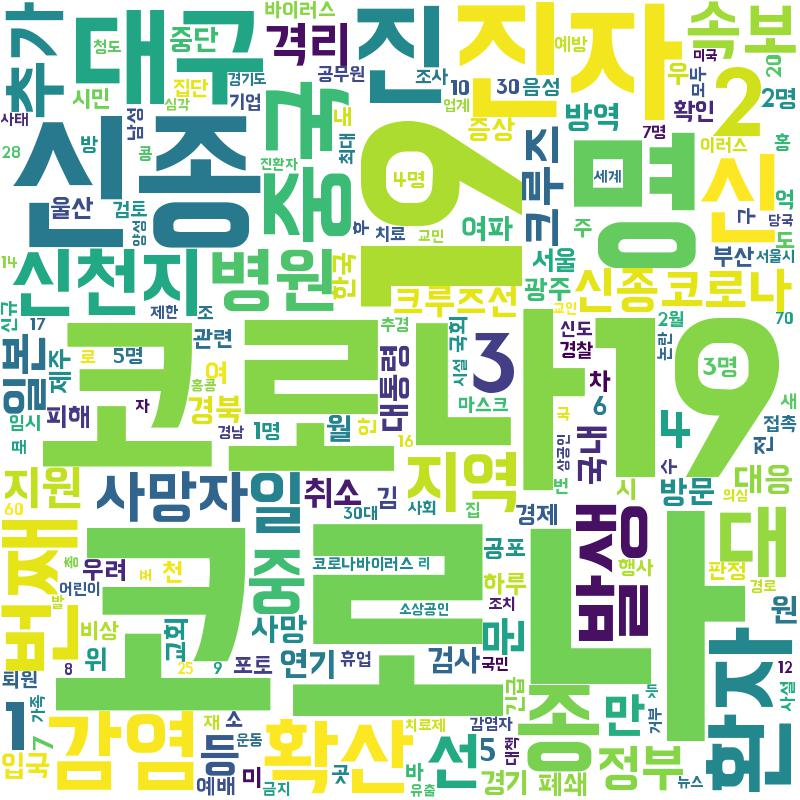

In [213]:
from IPython.display import Image

platform = str(input("원하는 신문사를 입력해주세요 (SBS or 한겨레) : "))
month = str(input("원하는 달을 입력해주세요(1-5) : "))

Image("{}{}월워드클라우드.jpg".format(platform,month))

# 한겨례 - 생활과 밀접, 정치적, 표현이 적나라함


1월 : 우(한), 폐렴, 중국, 신종, 환자, 의심, 입국, 박쥐, 쥐, 대통령
    
    =>코로나의 시작

    =>전반적으로 SBS와 비슷하나 박쥐, 쥐와 같이 확실하지 않은 이야기도 존재함

2월 :신천지, 크루즈, 크루즈선, 일본, 중국, 문 (대통령), 대구, 경기, 광주, 서울, 부산, 치료제, 대책, 소상공인

    => 신천지, 크루즈 사건 발생, 외국에 대한 언급보다 국내 언급이 더 많음, 치료제와 대책에 대한 언급, 시민의 입장을 대변하는 단어가 많음

3월 : 긴급, 지원, 소상공인, 피해, 부산, 경북, 대구, 울산, 이탈리아, 일본, 유럽

    => 시민 입장을 대변하는 단어/ 여전히 국내 언급이 더 많음

4월 : 총선, 문(대통령),트럼프, 정부, 지원,지원금, 경제, 실업, 피해, 의정부성모병원
    
    => 정치에 대한 언급이 적나라하게 드러남, 사태가 잠잠해지던 때, 의정부 성모병원에서 집단감염이 일어나 병원을 폐쇄했음.

5월 : 마스크, 쿠팡, 이태원, 클럽, 등교, 서울, 인천, 경기, 마스크, 대통령, 트럼프, 학생, 경제

    => 잠잠해지던 차에 쿠팡 사건과 이태원 사건이 발생하여 서울, 인천, 경기에 대한 언급이 확 오름.

## (6)결론

# 1. SBS와 한겨레 차이점
#### SBS
-정치와 관련된 언급이 한겨레와 비교하였을 때, 매우 적음 ('총선'에 대한 언급은 한번밖에 없을 정도). 

-세계정세에 대해 관심이 많음.

#### 한겨레

-박쥐처럼 아직 정확한 내용이 아닌(그때 당시) 일명 '카더라' 기사가 존재함

-정치에 대한 직접적인 언급이 있음.

-국민들이 겪는 일에 대한 언급이 많음(소상공인, 재난금, 실업 등)

-코로나 사태를 해결하기 위한 방법을 요구하는 단어들이 많음(대책, 치료제, 지원금)

-국외보단 국내에 더 비중을 두었음.

### 결론 1-1. 정치적인 측면에서 차이가 많이남
### 결론 1-2. SBS가 세계의 이야기를 하고있다면, 한겨레는 국민의 이야기를 하고있음.

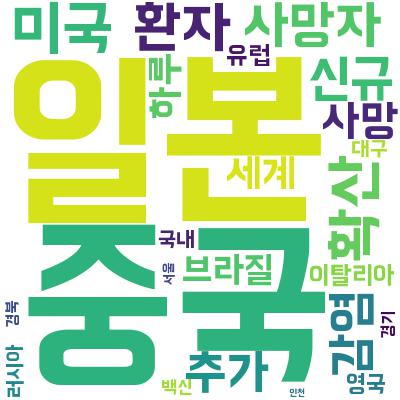

In [2]:
from IPython.display import Image
 
Image("SBS워드클라우드.jpg")

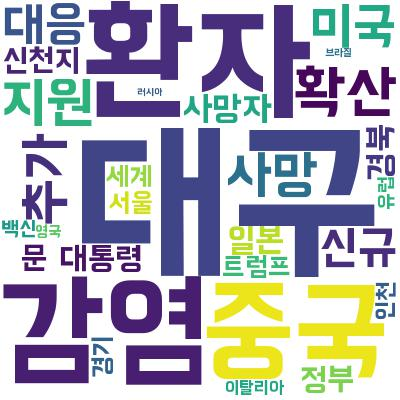

In [3]:
from IPython.display import Image
 
Image("한겨레워드클라우드.jpg")

# 2. 확진자 수와 단어 사용 빈도와의 관계

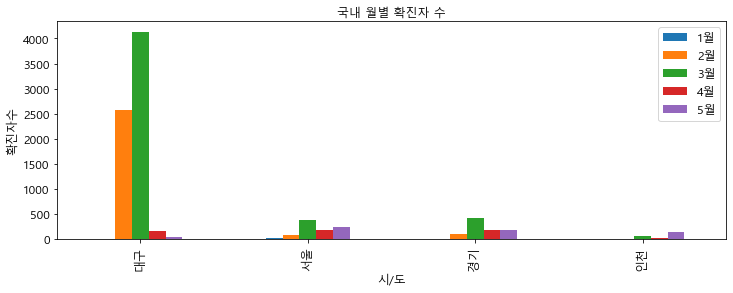

In [5]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

df = pd.read_csv('corona_confirmed.csv',index_col='시도',encoding ='utf-8')
nation_df=df.loc[['대구','서울','경기','인천']]
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = nation_df.plot(kind='bar', title='국내 월별 확진자 수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('시/도', fontsize=12)          # x축 정보 표시
ax.set_ylabel('확진자수', fontsize=12)     # y축 정보 표시
ax.legend(['1월','2월','3월','4월','5월'], fontsize=12)    # 범례 지정


### 가설 : 확진자 수가 급증하였던 2월,3월에 부정적인 단어의 사용 횟수가 많을 것이고, 확진자 수가 많이 줄어들었던 4월에 부정적인 단어의 수가 줄어들었을 것이다.

# 2- 1) 확진자수와 단어

In [9]:
find_haniword(1,'발생')

,1월단어,개수
88,발생,2


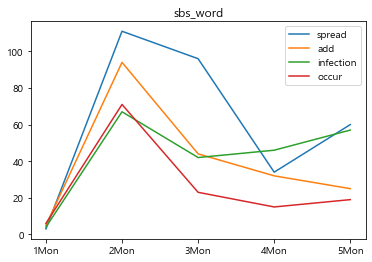

In [229]:
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

x_values = ['1Mon','2Mon','3Mon','4Mon','5Mon']
y_spread=[3,111,96,34,60] #확산
y_add=[5,94,44,32,25] #추가
y_infection = [4,67,42,46,57]#감염
y_occur =[6,71,23,15,19]#발생
plt.title('sbs_word')
plt.plot(x_values,y_spread)
plt.plot(x_values,y_add)
plt.plot(x_values,y_infection)
plt.plot(x_values,y_occur)
plt.legend(['spread','add','infection','occur'])
plt.show()

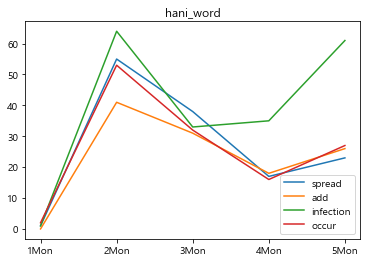

In [230]:
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

x_values = ['1Mon','2Mon','3Mon','4Mon','5Mon']
y_spread=[1,55,38,17,23] #확산
y_add=[0,41,31,18,26] #추가
y_infection = [1,64,33,35,61]#감염
y_occur=[2,53,32,16,27]#발생
plt.title('hani_word')
plt.plot(x_values,y_spread)
plt.plot(x_values,y_add)
plt.plot(x_values,y_infection)
plt.plot(x_values,y_occur)
plt.legend(['spread','add','infection','occur'])
plt.show()


    <그래프 분석>

    sbs와 한겨레를 비교해보니, 비슷한 의미를 가진 단어들끼리 언급 횟수의 차이는 있으나  그래프의 개형이 닮아있었다.
### 결론 2-1. 확진자 수와 부정적인 단어는 관계가 있다.



# 2-2)확진자 수와 국내 시/도 언급 횟수

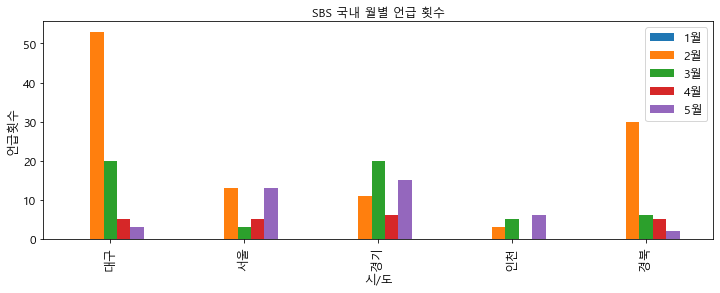

In [167]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

df = pd.read_csv('total_sbs.csv',index_col='SBS단어',encoding ='utf-8')
nation_df=df.loc[['대구','서울','경기','인천','경북']]
nation_df
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = nation_df.plot(kind='bar', title='SBS 국내 월별 언급 횟수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('시/도', fontsize=12)          # x축 정보 표시
ax.set_ylabel('언급횟수', fontsize=12)     # y축 정보 표시
ax.legend(['1월','2월','3월','4월','5월'], fontsize=12)    # 범례 지정


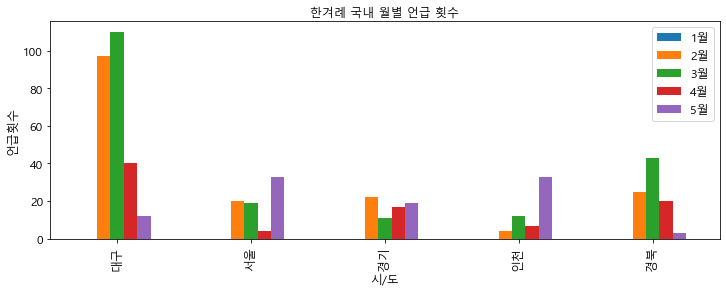

In [169]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

df = pd.read_csv('total_hani.csv',index_col='한겨레단어',encoding ='utf-8')
nation_df=df.loc[['대구','서울','경기','인천','경북']]
nation_df
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = nation_df.plot(kind='bar', title='한겨례 국내 월별 언급 횟수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('시/도', fontsize=12)          # x축 정보 표시
ax.set_ylabel('언급횟수', fontsize=12)     # y축 정보 표시
ax.legend(['1월','2월','3월','4월','5월'], fontsize=12)   # 범례 지정


### < SBS >
    
    단어와 마찬가지로 각 시/도별 언급 횟수도 확진자 수가 급증한 2월,3월에 증가하고 4월에 줄어들다가 5월에 다시 증가하는 모양이다. 확진자의 수와 언급 횟수가 일치하지 않는 경우도 존재한다. 대구 2월과 경기/서울 5월이 '확진자의 증가폭'과 '언급 횟수의 증가폭'이 특히 차이가 난다. 예외인 부분을 살펴보면 그 시기에 특정 사건이 일어났음을 알 수 있다. -워드클라우드 참고-

    -대구, 경북 2월 : 신천지 사건

    -서울, 경기 5월 : 이태원 클럽발
    
### < 한겨레 > 
    
    SBS보다 확진자 증가폭을 더 많이 따르는 편이다. 무엇보다 언급 횟수가 차이가 많이 난다. y축을 보면, sbs는 50내외인 반면, 한겨레는 100내외이다. 그리고 그 도시에서 사건이 일어난 달에 언급횟수가 급증하는 것을 볼 수 있다. 대구/경북의 경우 신천지로 인해 급증했던 2월 그리고 꾸준히 확진자가 증가했던 3월에 언급횟수가 계속 증가한다. 또한 5월에 이태원발, 쿠팡 사건 등으로 인해 서울, 경기, 인천의 언급횟수가 눈에 띄게 증가하였다. 

# 3. 국외 언급

#### 3-1) 단어 '세계'의 언급

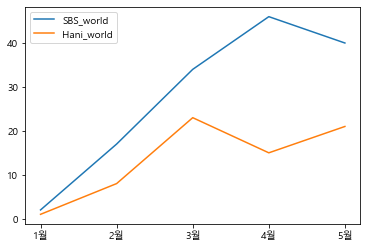

In [181]:
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

x_values = ['1월','2월','3월','4월','5월']
y_world=[2,17,34,46,40] #세계
y_hani=[1,8,23,15,21]
plt.plot(x_values,y_world)
plt.plot(x_values,y_hani)
plt.legend(['SBS_world','Hani_world'])
plt.show()

## SBS와 한겨레의 월별 언급 횟수

##### 중국과 일본을 제외하고 대부분의 나라들이 일정한 그래프 개형을 유지하고 있다.

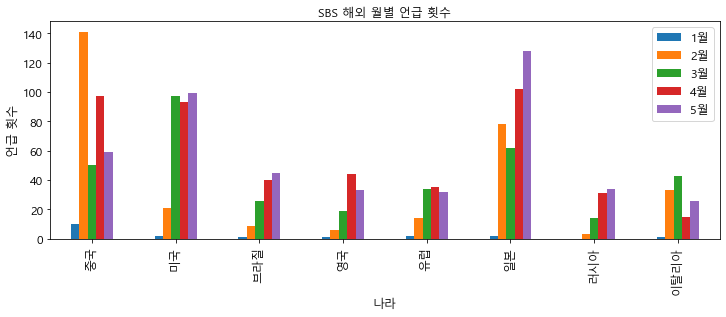

In [182]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

df = pd.read_csv('total_sbs.csv',index_col='SBS단어',encoding ='utf-8')
nation_df=df.loc[['중국','미국','브라질','영국','유럽','일본','러시아','이탈리아']]
nation_df
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = nation_df.plot(kind='bar', title='SBS 해외 월별 언급 횟수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('나라', fontsize=12)          # x축 정보 표시
ax.set_ylabel('언급 횟수', fontsize=12)     # y축 정보 표시
ax.legend(['1월','2월','3월','4월','5월'], fontsize=12)    # 범례 지정


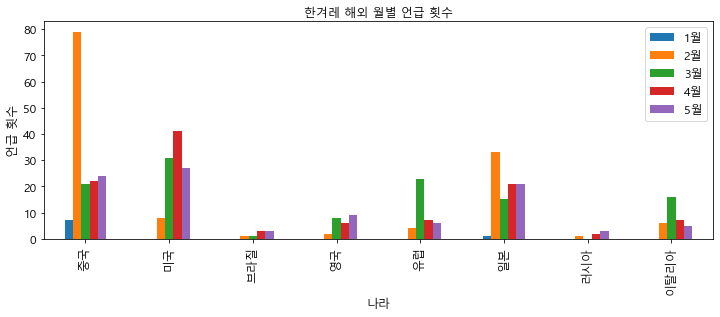

In [212]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

df = pd.read_csv('total_hani.csv',index_col='한겨레단어',encoding ='utf-8')
nation_df=df.loc[['중국','미국','브라질','영국','유럽','일본','러시아','이탈리아']]
nation_df
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = nation_df.plot(kind='bar', title='한겨레 해외 월별 언급 횟수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('나라', fontsize=12)          # x축 정보 표시
ax.set_ylabel('언급 횟수', fontsize=12)     # y축 정보 표시
ax.legend(['1월','2월','3월','4월','5월'], fontsize=12)    # 범례 지정


    발생지인 중국을 제외하고 대부분의 나라가 3월달에 언급 증가폭이 커짐을 볼 수 있다. 그래프 중에 눈에 띄는 부분은 바로 일본의 2월 그래프인데, 워드클라우드를 보면 2월에 크루즈와 올림픽에 대한 언급이 많았음을 알 수 있다. 또한 한겨레보다는 SBS가 세계정세에 관심이 많음을 다시 확인할 수 있다. (y축 비교)
    

### 결론 3-1) 해외는 3월에 코로나가 본격적으로 시작하였다.

## (7)오픈 소스 활용한 부분 명시

## (10)4)의 가공한 데이터 원본

## (11)프로젝트를 위해 본인이 직접 개발한 python 소스코드 원본

In [ ]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
from konlpy.tag import Kkma
import csv
kkma = Kkma()

#SBS 5월

article_title = []
article_detail = []
for i in range(1,100):
    #실행 파일과 같은곳에 chrome드라이버를 위치시켰기에 경로를 따로 지정해주지않음
    driver = webdriver.Chrome()
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.05.01&searchTermEndDate=2020.05.31&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=3&sort=RANK'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
    #print(details)
    #print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)
        
#txt = article_title
#kkma.pos(txt)

#형태소 분석을 통해 명사만 리스트에 따로 저장

noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

#단어와 그 단어가 몇번 쓰였는지 알기 위핸 for문 

count_text = []
count = []

#noun_list에서 단어들을 count_text에 넣는다. 만약에 이미 count_text에 그 단어가 있으면, count에 +1을 해준다.(중복제거)

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break
                    
#파일 저장

f1 = open('SBS5월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["5월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

#워드클라우드로 만들기 위해 dict형으로 변환하기 위한 작업

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)

In [7]:
#찾고싶은 단어 찾기
def find_sbsword(month,word):
    df=pd.read_csv('SBS{}월.csv'.format(month),encoding='utf-8')
    finding = df['{}월단어'.format(month)]==word
    A=df[finding]
    return A

In [8]:
#찾고싶은 단어 찾기
def find_haniword(month,word):
    df=pd.read_csv('한겨레{}월.csv'.format(month),encoding='utf-8')
    finding = df['{}월단어'.format(month)]==word
    A=df[finding]
    return A

In [215]:
#사용예시

word_list = ['코로나','코로나19','일본','감염','사망자','환자','중국','확산','대구','신천지','정부','문','대통령','지원','대응','미국','경북','신규','트럼프']
print("=======5==========")
for word in word_list:
    print(find_haniword(5,word))
print("=======4==========")
for word in word_list:
    print(find_haniword(4,word))
print("=======3==========")
for word in word_list:
    print(find_haniword(3,word))
print("=======2==========")
for word in word_list:
    print(find_haniword(2,word))
print("=======1==========")
for word in word_list:
    print(find_haniword(1,word))


=======5==========
  5월단어   개수
1  코로나  443
    5월단어   개수
2  코로나19  213
    5월단어   개수
390   일본   21
    5월단어   개수
222   감염   61
   5월단어   개수
50  사망자    5
    5월단어   개수
218   환자   28
    5월단어   개수
249   중국   24
    5월단어   개수
369   확산   23
    5월단어   개수
154   대구   12
    5월단어   개수
540  신천지    5
    5월단어   개수
782   정부   16
    5월단어   개수
213    문   19
    5월단어   개수
214  대통령   19
    5월단어   개수
287   지원   23
   5월단어   개수
80   대응   10
   5월단어   개수
79   미국   27
     5월단어   개수
1844   경북    3
    5월단어   개수
250   신규   12
   5월단어   개수
94  트럼프   24
=======4==========
  4월단어   개수
4  코로나  628
     4월단어   개수
10  코로나19  377
   4월단어   개수
95   일본   21
   4월단어   개수
55   감염   35
    4월단어   개수
378  사망자   23
   4월단어   개수
65   환자   53
    4월단어   개수
114   중국   22
    4월단어   개수
198   확산   17
    4월단어   개수
562   대구   40
    4월단어   개수
675  신천지    4
    4월단어   개수
983   정부   20
    4월단어   개수
166    문   40
    4월단어   개수
167  대통령   38
    4월단어   개수
144   지원   34
    4월단어   개수
170   대응   24
    4월단어   개수
358   미국   41


In [24]:
# 월별 전체 단어에서 n회 이상 언급된 단어만 찾아서 다시 파일 만들기
def SBS_select(month,n):
    f = open('SBS{}월.csv'.format(month), 'r', encoding='utf-8')


    rdr = csv.reader(f)

    num = []
    word = []

    for line in rdr:
        word.append(line[0])
        num.append(line[1])

    f.close()

    f1 = open('SBS{}월-1.csv'.format(month),'w',encoding = 'utf-8',newline='')

    wr1 = csv.writer(f1)

    wr1.writerow([str(month)+"월단어", " 개수"])
    for i in range(1,len(num)):
        if(int(num[i])>n):
            wr1.writerow([word[i],num[i]])

    f1.close()

In [1]:
# sbs, 한겨레 전체 단어 csv파일 읽어서 워드클라우드 만들기

from wordcloud import WordCloud
import csv

sbs_word = []
sbs_num=[]
mon1=[]
mon2=[]
mon3=[]
mon4=[]
mon5=[]

with open('total_sbs.csv','r',encoding='utf-8') as f:
    reader = csv.reader(f)
    
    for txt in reader:  
        sbs_word.append(txt[0])
        mon1.append(txt[1])
        mon2.append(txt[2])
        mon3.append(txt[3])
        mon4.append(txt[4])
        mon5.append(txt[5])
        
#첫줄 삭제
        
sbs_word.remove(sbs_word[0])
mon1.remove(mon1[0])
mon2.remove(mon2[0])
mon3.remove(mon3[0])
mon4.remove(mon4[0])
mon5.remove(mon5[0])

#월별 갯수 합치기

for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])


for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나19"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])

for i in range(len(mon1)):
    sum_num=int(mon1[i])+int(mon2[i])+int(mon3[i])+int(mon4[i])+int(mon5[i])
    sbs_num.append(sum_num)
    
last = []

for i in range(len(sbs_word)):
    imsi = []
    imsi.append(sbs_word[i])
    imsi.append(sbs_num[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 400,height = 400)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('SBS워드클라우드.jpg')

In [2]:
from wordcloud import WordCloud
import csv

sbs_word = []
sbs_num=[]
mon1=[]
mon2=[]
mon3=[]
mon4=[]
mon5=[]

with open('total_hani.csv','r',encoding='utf-8') as f:
    reader = csv.reader(f)
    
    for txt in reader:  
        sbs_word.append(txt[0])
        mon1.append(txt[1])
        mon2.append(txt[2])
        mon3.append(txt[3])
        mon4.append(txt[4])
        mon5.append(txt[5])
        
        
sbs_word.remove(sbs_word[0])
mon1.remove(mon1[0])
mon2.remove(mon2[0])
mon3.remove(mon3[0])
mon4.remove(mon4[0])
mon5.remove(mon5[0])

for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])


for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나19"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])
;
for i in range(len(mon1)):
    sum_num=int(mon1[i])+int(mon2[i])+int(mon3[i])+int(mon4[i])+int(mon5[i])
    sbs_num.append(sum_num)
    
last = []

for i in range(len(sbs_word)):
    imsi = []
    imsi.append(sbs_word[i])
    imsi.append(sbs_num[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 400,height = 400)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨레워드클라우드.jpg')

처음에는 아래와 같이 가져온 정보를 직접 parsing하려고 하였으나, 결과를 보니 필요없는 것들이 제대로 제거가 되지 않아서 결국 위 처럼 형태소 분석을 하여 해결하였다.

In [44]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import csv

article_title = []
article_detail = []
for i in range(1,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get('http://jtbc.joins.com/search/news?page={}&term=%EC%BD%94%EB%A1%9C%EB%82%9819'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    articles = soup.find_all('h3')
    details = soup.find_all('div', attrs = {'class':'vod_exp'})
    
    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

#print(article_title)
#print(article_detail)

final =[]

for i in range(len(article_title)):
    new_result = article_title[i].split(" ")
    final.append(new_result)
    if(new_result[0] == "[앵커]" or '[기자]' or"\n[인터뷰]" or "\n[맞장토론]"):
        new_result.remove(new_result[0])

for j in range(len(article_detail)):
    result = article_detail[j].split(" ")
    final.append(result)
    if(result[0] == "[앵커]" or '[기자]' or '...' ):
        result.remove(result[0])

#print(final)
'''
write_file = open('jtbc.txt','w')
read_file =open('jtbc.txt','r')

for i in range(len(final)):
    for j in range(len(final[i])):
        text = final[i][j]
        if(text != ''):
            write_file.write(text)
            write_file.write('\n')

write_file.close()
'''
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('JTBC-1.csv','w',encoding = 'utf-8',newline='')
f2 = open('JTBC-2.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr2= csv.writer(f2)
wr1.writerow(["JTBC단어", " 개수"])
wr2.writerow(["JTBC단어","개수"])
for i in range(len(count)):
    if(count[i]<=5):
        wr1.writerow([count_text[i],count[i]])
    else:
        wr2.writerow([count_text[i],count[i]])

f1.close()
f2.close()
#필요없는 것들을 제외하려고 하였으나 실패->형태소 분석 사용
'''
for i in range(len(count_text)):
    if (count_text[i] in '■'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '저작권은'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '바랍니다'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '[앵커]'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '/'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '...'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '[기자]'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '기자입니다.'):
        count_text.remove(count_text[i])
        count.remove(count[i])

count_file = open('jtbc_count.txt','w',-1,"utf-8")
new_count_file = open('jtbc_new_count.txt','w',-1,"utf-8")

for i in range(len(count)):
    if(count[i] == 1 or count[i] == 2):
        new_count_file.write(count_text[i])
        new_count_file.write('  ')
        new_count_file.write(str(count[i]))
        new_count_file.write('\n')
    else:
        count_file.write(count_text[i])
        count_file.write('  ')
        count_file.write(str(count[i]))
        count_file.write('\n')

count_file.close()
new_count_file.close()
'''

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)

wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('JTBC워드클라우드.jpg')


IndexError: list index out of range

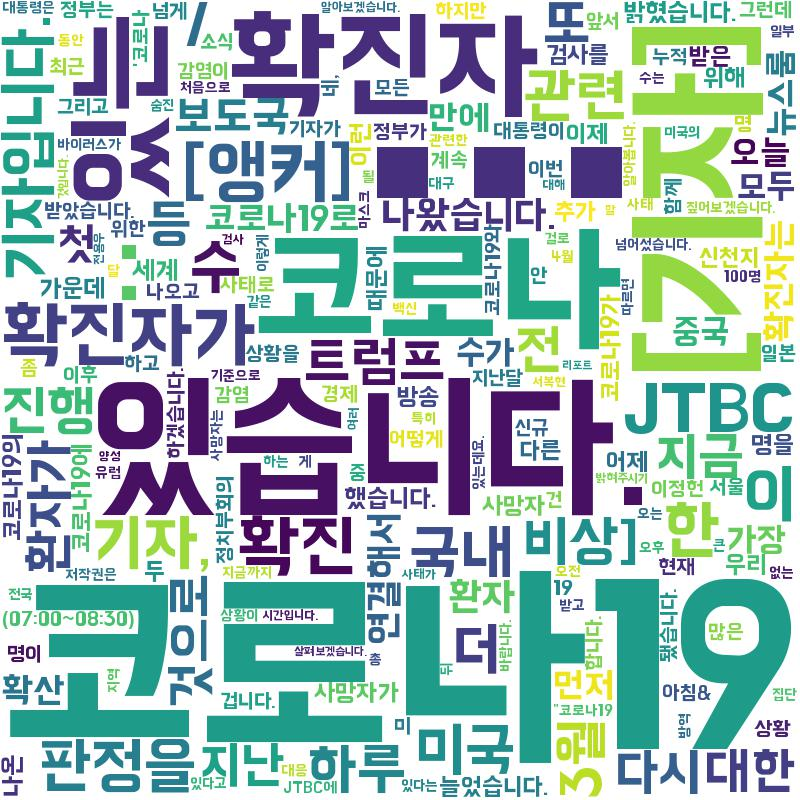

In [53]:
from IPython.display import Image
#실패
Image("JTBC워드클라우드1.jpg")